In [0]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
import random

In [0]:
def Softmax(temp_list,arms_total=10,steps=1000,runs=500):
  R_plot = []
  Opt_plot= []

  print("\nSoftmax Algo")

  def bandit1(i,qstar_arr):
    r = np.random.normal(qstar_arr[i],1)
    return r
  
  for temp in temp_list:
    chosen_arm = 0
    count = 0;
    R_avg = np.zeros(steps)
    opt_avg = np.zeros(steps)

    for j in tqdm_notebook(range(runs)):
      
      qstar_arr = np.random.standard_normal(arms_total)
      true_best = np.argmax(qstar_arr,axis = 0) 
      
      R_arr=[]
      opt_arr = np.zeros(steps)

      Qarr = np.zeros(arms_total)
      Narr = np.zeros(arms_total)
    
      for i in range(steps):
        softmax_prob = (np.exp(Qarr/temp))/np.sum(np.exp(Qarr/temp)) 
        chosen_arm = np.random.choice(range(arms_total), 1, p = softmax_prob) 
        
        
        R = bandit1(chosen_arm,qstar_arr)
        
        Narr[chosen_arm] = Narr[chosen_arm]+1
        Qarr[chosen_arm] = Qarr[chosen_arm] + (R-Qarr[chosen_arm])/Narr[chosen_arm]
          
        R_arr.append(Qarr[chosen_arm])

        if true_best == chosen_arm:
          opt_arr[i] =  opt_arr[i] + 1

      for k in range(steps):
        R_avg[k] = R_avg[k]+(R_arr[k]-R_avg[k])/(j+1)
        opt_avg[k] = opt_avg[k] + (opt_arr[k]-opt_avg[k])/(j+1)

    R_plot.append(R_avg)
    Opt_plot.append(opt_avg)
  
  return R_plot,Opt_plot    


In [0]:
def Softmax_plots(R_plot,Opt_plot):
  step_list = list(range(len(R_plot[0])))
  R_fig=plt.figure(figsize=(12,6)).add_subplot(111)
  Opt_fig=plt.figure(figsize=(12,6)).add_subplot(111)

  colors = ['m', 'g', 'b', 'r', 'c','y', 'k']

  for i in range(len(R_plot)):
      R_fig.plot(step_list, R_plot[i], colors[i] ,label = "Temp=" + str(temp_list[i]))

  R_fig.title.set_text(r'Softmax : 10 arms')
  R_fig.set_ylabel('Average Reward')
  R_fig.set_xlabel('Steps')
  R_fig.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)    


  for i in range(len(Opt_plot)):
      Opt_fig.plot(step_list, Opt_plot[i]*100, colors[i] ,label = "Temp=" + str(temp_list[i]))

  Opt_fig.title.set_text(r'Softmax : 10 arms')
  Opt_fig.set_ylabel('% Optimal Action')
  Opt_fig.set_xlabel('Steps')
  Opt_fig.set_ylim(0,100)
  Opt_fig.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)    

  plt.show()


Softmax Algo


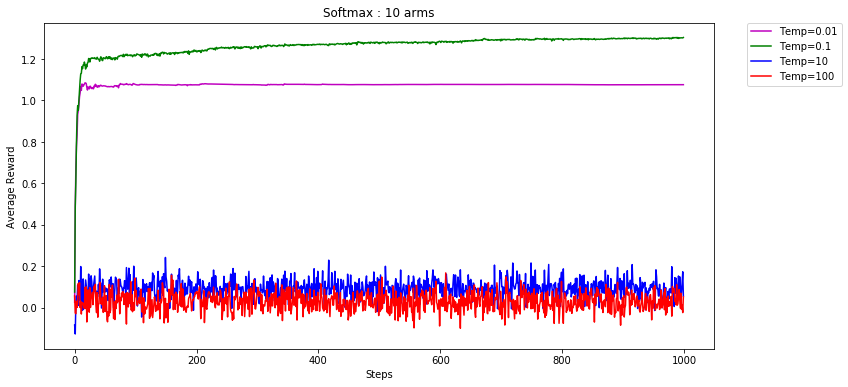

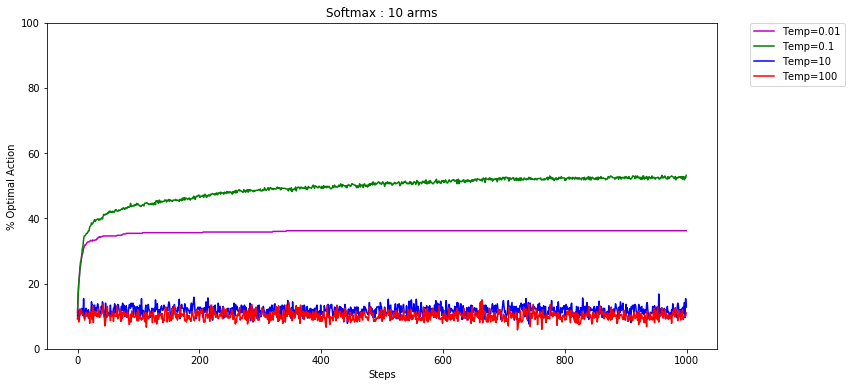

In [4]:
if __name__ == '__main__':
  temp_list = [0.01,0.1,10,100]
  R_plot_s,Opt_plot_s=Softmax(temp_list)
  Softmax_plots(R_plot_s,Opt_plot_s)